# Import libary


In [55]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_extraction import text

    
from nltk.tokenize import RegexpTokenizer

# Import collected post


In [2]:
df_pokemon = pd.read_csv('../datasets/pokemon_data.csv')
df_digimon = pd.read_csv('../datasets/digimon_data.csv')

In [3]:
df_pokemon.head()

,title,score,id,subreddit,url,num_comments,body,created
0,[Weekly Questions Thread] 06 March 2023,17,11jy9y2,pokemon,https://www.reddit.com/r/pokemon/comments/11jy...,625,**Have any questions about Pokémon that you'd ...,1.678108e+09
1,/r/Pokemon is looking for moderators! Apply wi...,39,11eofvy,pokemon,https://www.reddit.com/r/pokemon/comments/11eo...,28,[We choose YOU!](https://preview.redd.it/7gm1j...,1.677629e+09
2,"""Crikey! Have a go at that beauty of a Pokemon...",19559,11ntzp1,pokemon,https://i.redd.it/y85pnui2qxma1.jpg,494,NaN,1.678466e+09
3,Remade the Pokémon Sleep logo with a more dese...,4102,11nrn38,pokemon,https://i.redd.it/9pkzyha2yyma1.jpg,279,NaN,1.678461e+09
4,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),5505,11npdq4,pokemon,https://i.redd.it/i6gi1gmbhyma1.jpg,55,NaN,1.678455e+09


In [4]:
df_digimon.head()

,title,score,id,subreddit,url,num_comments,body,created
0,"Digimon World: Next Order, Switch & PC Version...",79,118l0ny,digimon,https://www.reddit.com/r/digimon/comments/118l...,190,https://preview.redd.it/mn16ywa24nja1.jpg?widt...,1.677029e+09
1,"Digimon Ghost Game Episode 65 ""The Black Zone ...",92,11bt7d4,digimon,https://www.reddit.com/r/digimon/comments/11bt...,277,[Crunchyroll's page for Ghost Game is here](ht...,1.677353e+09
2,"While I didn't notice as a kid, as an adult it...",1008,11nsmlz,digimon,https://i.redd.it/rfiqqcl35zma1.jpg,155,NaN,1.678463e+09
3,Found at my local FYE- Digimon branded milk tea,102,11o8gdv,digimon,https://i.redd.it/utu76y7lu0na1.jpg,9,NaN,1.678502e+09
4,Super happy with how this turned out,127,11o6kcs,digimon,https://i.redd.it/6ckv5xy5w1na1.png,5,NaN,1.678497e+09


# Drop duplicates

removing duplicared comments

In [5]:
df_pokemon.duplicated().sum()

0

In [6]:
df_digimon.duplicated().sum()

0

In [7]:
df_pokemon.isnull().sum()

title              0
score              0
id                 0
subreddit          0
url                0
num_comments       0
body            1042
created            0
dtype: int64

In [8]:
df_digimon.isnull().sum()

title             0
score             0
id                0
subreddit         0
url               0
num_comments      0
body            642
created           0
dtype: int64

In [9]:
df_pokemon.shape

(1430, 8)

In [10]:
df_digimon.shape

(1060, 8)

# Drop columns that we are not using for model

In [11]:
df_pokemon.drop(columns=['score','id','url','num_comments','created'], inplace=True)
df_digimon.drop(columns=['score','id','url','num_comments','created'], inplace=True)

combine title and body into new text columns

In [12]:
df_pokemon = df_pokemon.fillna('')
df_pokemon['text'] = df_pokemon['title'].astype(str) +" "+ df_pokemon['body'].astype(str)
df_pokemon.head()

,title,subreddit,body,text
0,[Weekly Questions Thread] 06 March 2023,pokemon,**Have any questions about Pokémon that you'd ...,[Weekly Questions Thread] 06 March 2023 **Have...
1,/r/Pokemon is looking for moderators! Apply wi...,pokemon,[We choose YOU!](https://preview.redd.it/7gm1j...,/r/Pokemon is looking for moderators! Apply wi...
2,"""Crikey! Have a go at that beauty of a Pokemon...",pokemon,,"""Crikey! Have a go at that beauty of a Pokemon..."
3,Remade the Pokémon Sleep logo with a more dese...,pokemon,,Remade the Pokémon Sleep logo with a more dese...
4,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),pokemon,,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept)


In [13]:
df_digimon = df_digimon.fillna('')
df_digimon['text'] = df_digimon['title'].astype(str) +" "+ df_pokemon['body'].astype(str)
df_digimon.head()

,title,subreddit,body,text
0,"Digimon World: Next Order, Switch & PC Version...",digimon,https://preview.redd.it/mn16ywa24nja1.jpg?widt...,"Digimon World: Next Order, Switch & PC Version..."
1,"Digimon Ghost Game Episode 65 ""The Black Zone ...",digimon,[Crunchyroll's page for Ghost Game is here](ht...,"Digimon Ghost Game Episode 65 ""The Black Zone ..."
2,"While I didn't notice as a kid, as an adult it...",digimon,,"While I didn't notice as a kid, as an adult it..."
3,Found at my local FYE- Digimon branded milk tea,digimon,,Found at my local FYE- Digimon branded milk tea
4,Super happy with how this turned out,digimon,,Super happy with how this turned out


In [14]:
#Converting the text in 'title' to lowercase
df_pokemon['title_cleaned'] = df_pokemon['title'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
df_pokemon['text_cleaned'] = df_pokemon['text'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
df_digimon['title_cleaned'] = df_digimon['title'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
df_digimon['text_cleaned'] = df_digimon['text'].apply(lambda x: " ".join(x.lower()
for x in x.split()))

In [15]:
#Remove numbers
df_pokemon['title_cleaned'].replace('\d+', '', regex=True, inplace=True)
df_pokemon['text_cleaned'].replace('\d+', '', regex=True, inplace=True)

df_digimon['title_cleaned'].replace('\d+', '', regex=True, inplace=True)
df_digimon['text_cleaned'].replace('\d+', '', regex=True, inplace=True)

In [16]:
#Remove URL
df_pokemon['title_cleaned'].str.replace('http\S+','')
df_pokemon['text_cleaned'].str.replace('http\S+','')

df_digimon['title_cleaned'].str.replace('http\S+','')
df_digimon['text_cleaned'].str.replace('http\S+','')

/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/796228092.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pokemon['title_cleaned'].str.replace('http\S+','')
/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/796228092.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pokemon['text_cleaned'].str.replace('http\S+','')
/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/796228092.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_digimon['title_cleaned'].str.replace('http\S+','')
/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/796228092.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_digimon['text_cleaned'].str.replace('http\S+','')


0       digimon world: next order, switch & pc version...
1       digimon ghost game episode  "the black zone of...
2       while i didn't notice as a kid, as an adult it...
3         found at my local fye- digimon branded milk tea
4                    super happy with how this turned out
                              ...                        
1055        digimon world re:digitize:decode (ds version)
1056                               digimon world  trailer
1057                         ps digimon world  trailer hd
1058                         ps digimon world  trailer hd
1059                          ps digimon world trailer hd
Name: text_cleaned, Length: 1060, dtype: object

In [17]:
#Remove punctuation
df_pokemon['title_cleaned'] = df_pokemon['title_cleaned'].str.replace(r'[^\w\s]+', '')
df_pokemon['text_cleaned'] = df_pokemon['text_cleaned'].str.replace(r'[^\w\s]+', '')

df_digimon['title_cleaned'] = df_digimon['title_cleaned'].str.replace(r'[^\w\s]+', '')
df_digimon['text_cleaned'] = df_digimon['text_cleaned'].str.replace(r'[^\w\s]+', '')

/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/1657638313.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pokemon['title_cleaned'] = df_pokemon['title_cleaned'].str.replace(r'[^\w\s]+', '')
/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/1657638313.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pokemon['text_cleaned'] = df_pokemon['text_cleaned'].str.replace(r'[^\w\s]+', '')
/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/1657638313.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_digimon['title_cleaned'] = df_digimon['title_cleaned'].str.replace(r'[^\w\s]+', '')
/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/1657638313.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_digimon['text_cleaned'] = 

In [18]:
df_pokemon

,title,subreddit,body,text,title_cleaned,text_cleaned
0,[Weekly Questions Thread] 06 March 2023,pokemon,**Have any questions about Pokémon that you'd ...,[Weekly Questions Thread] 06 March 2023 **Have...,weekly questions thread march,weekly questions thread march have any quest...
1,/r/Pokemon is looking for moderators! Apply wi...,pokemon,[We choose YOU!](https://preview.redd.it/7gm1j...,/r/Pokemon is looking for moderators! Apply wi...,rpokemon is looking for moderators apply within,rpokemon is looking for moderators apply withi...
2,"""Crikey! Have a go at that beauty of a Pokemon...",pokemon,,"""Crikey! Have a go at that beauty of a Pokemon...",crikey have a go at that beauty of a pokemon ...,crikey have a go at that beauty of a pokemon ...
3,Remade the Pokémon Sleep logo with a more dese...,pokemon,,Remade the Pokémon Sleep logo with a more dese...,remade the pokémon sleep logo with a more dese...,remade the pokémon sleep logo with a more dese...
4,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),pokemon,,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),oc birb hisuian decidueye preevo concept,oc birb hisuian decidueye preevo concept
...,...,...,...,...,...,...
1425,I'm back with another set guys! I'm the guy wi...,pokemongo,,I'm back with another set guys! I'm the guy wi...,im back with another set guys im the guy with ...,im back with another set guys im the guy with ...
1426,Always looked at those high level players with...,pokemongo,,Always looked at those high level players with...,always looked at those high level players with...,always looked at those high level players with...
1427,Sense everyone is deciding to post there shiny...,pokemongo,,Sense everyone is deciding to post there shiny...,sense everyone is deciding to post there shiny...,sense everyone is deciding to post there shiny...
1428,9k cp alakazam?,pokemongo,,9k cp alakazam?,k cp alakazam,k cp alakazam


In [19]:
df_digimon

,title,subreddit,body,text,title_cleaned,text_cleaned
0,"Digimon World: Next Order, Switch & PC Version...",digimon,https://preview.redd.it/mn16ywa24nja1.jpg?widt...,"Digimon World: Next Order, Switch & PC Version...",digimon world next order switch pc versions g...,digimon world next order switch pc versions g...
1,"Digimon Ghost Game Episode 65 ""The Black Zone ...",digimon,[Crunchyroll's page for Ghost Game is here](ht...,"Digimon Ghost Game Episode 65 ""The Black Zone ...",digimon ghost game episode the black zone of ...,digimon ghost game episode the black zone of ...
2,"While I didn't notice as a kid, as an adult it...",digimon,,"While I didn't notice as a kid, as an adult it...",while i didnt notice as a kid as an adult it r...,while i didnt notice as a kid as an adult it r...
3,Found at my local FYE- Digimon branded milk tea,digimon,,Found at my local FYE- Digimon branded milk tea,found at my local fye digimon branded milk tea,found at my local fye digimon branded milk tea
4,Super happy with how this turned out,digimon,,Super happy with how this turned out,super happy with how this turned out,super happy with how this turned out
...,...,...,...,...,...,...
1055,Digimon World Re:Digitize:Decode (3DS version),DigimonWorld,DW Re:DD Ending (english patch)\n\n[https://ww...,Digimon World Re:Digitize:Decode (3DS version),digimon world redigitizedecode ds version,digimon world redigitizedecode ds version
1056,Digimon World 4 Trailer,DigimonWorld,,Digimon World 4 Trailer,digimon world trailer,digimon world trailer
1057,PS1 Digimon world 3 Trailer HD,DigimonWorld,,PS1 Digimon world 3 Trailer HD,ps digimon world trailer hd,ps digimon world trailer hd
1058,PS1 Digimon World 2 Trailer HD,DigimonWorld,,PS1 Digimon World 2 Trailer HD,ps digimon world trailer hd,ps digimon world trailer hd


# Checking for the top word in both pokemon and digimon

In [20]:
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

pokemon_cvec = cvec.fit_transform(df_pokemon['text_cleaned'])
pokemon_cvec = pd.DataFrame(pokemon_cvec.toarray(),
                       columns = cvec.get_feature_names())
pokemon_top_words = pokemon_cvec.sum().sort_values(ascending=False)
pokemon_top_20 = pokemon_top_words.head(20)


In [21]:
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

digimon_cvec = cvec.fit_transform(df_digimon['text_cleaned'])
digimon_cvec = pd.DataFrame(digimon_cvec.toarray(),
                       columns = cvec.get_feature_names())
digimon_top_words = digimon_cvec.sum().sort_values(ascending=False)
digimon_top_20 = digimon_top_words.head(20)


Text(0.5, 0, 'Word Count')

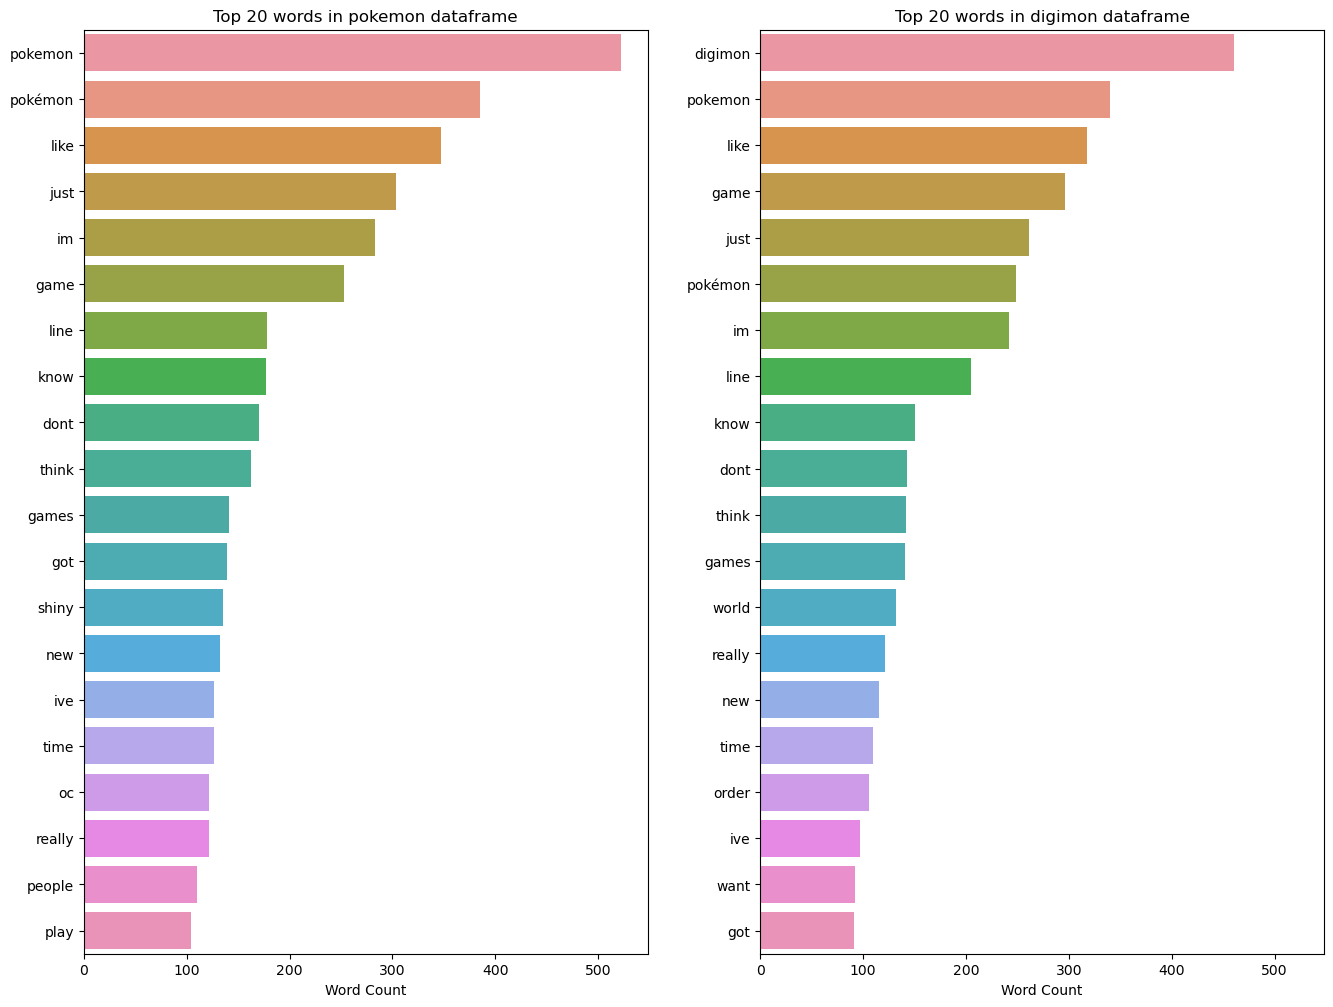

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,12), sharex = True)
                      
sns.barplot( x=pokemon_top_20, y=pokemon_top_20.index.values,ax=ax[0])
ax[0].set_title('Top 20 words in pokemon dataframe')
ax[0].set_xlabel('Word Count')               
sns.barplot( x=digimon_top_20, y=digimon_top_20.index.values,ax=ax[1])
ax[1].set_title('Top 20 words in digimon dataframe')
ax[1].set_xlabel('Word Count')  

- the word 'pokemon' will likely classify the post to pokemon, while the word 'digimon' will likley as digimon post

## Check for bigrams

In [41]:
cvec = CountVectorizer(stop_words='english', ngram_range = (2,2))

pokemon_cvec = cvec.fit_transform(df_pokemon['text_cleaned'])
pokemon_cvec = pd.DataFrame(pokemon_cvec.toarray(),
                       columns = cvec.get_feature_names())
pokemon_top_2words = pokemon_cvec.sum().sort_values(ascending=False)
pokemon_top_20_2words = pokemon_top_2words.head(20)


In [42]:
cvec = CountVectorizer(stop_words='english', ngram_range = (2,2))

digimon_cvec = cvec.fit_transform(df_digimon['text_cleaned'])
digimon_cvec = pd.DataFrame(digimon_cvec.toarray(),
                       columns = cvec.get_feature_names())
digimon_top_2words = digimon_cvec.sum().sort_values(ascending=False)
digimon_top_20_2words = digimon_top_2words.head(20)


Text(0.5, 0, 'Word Count')

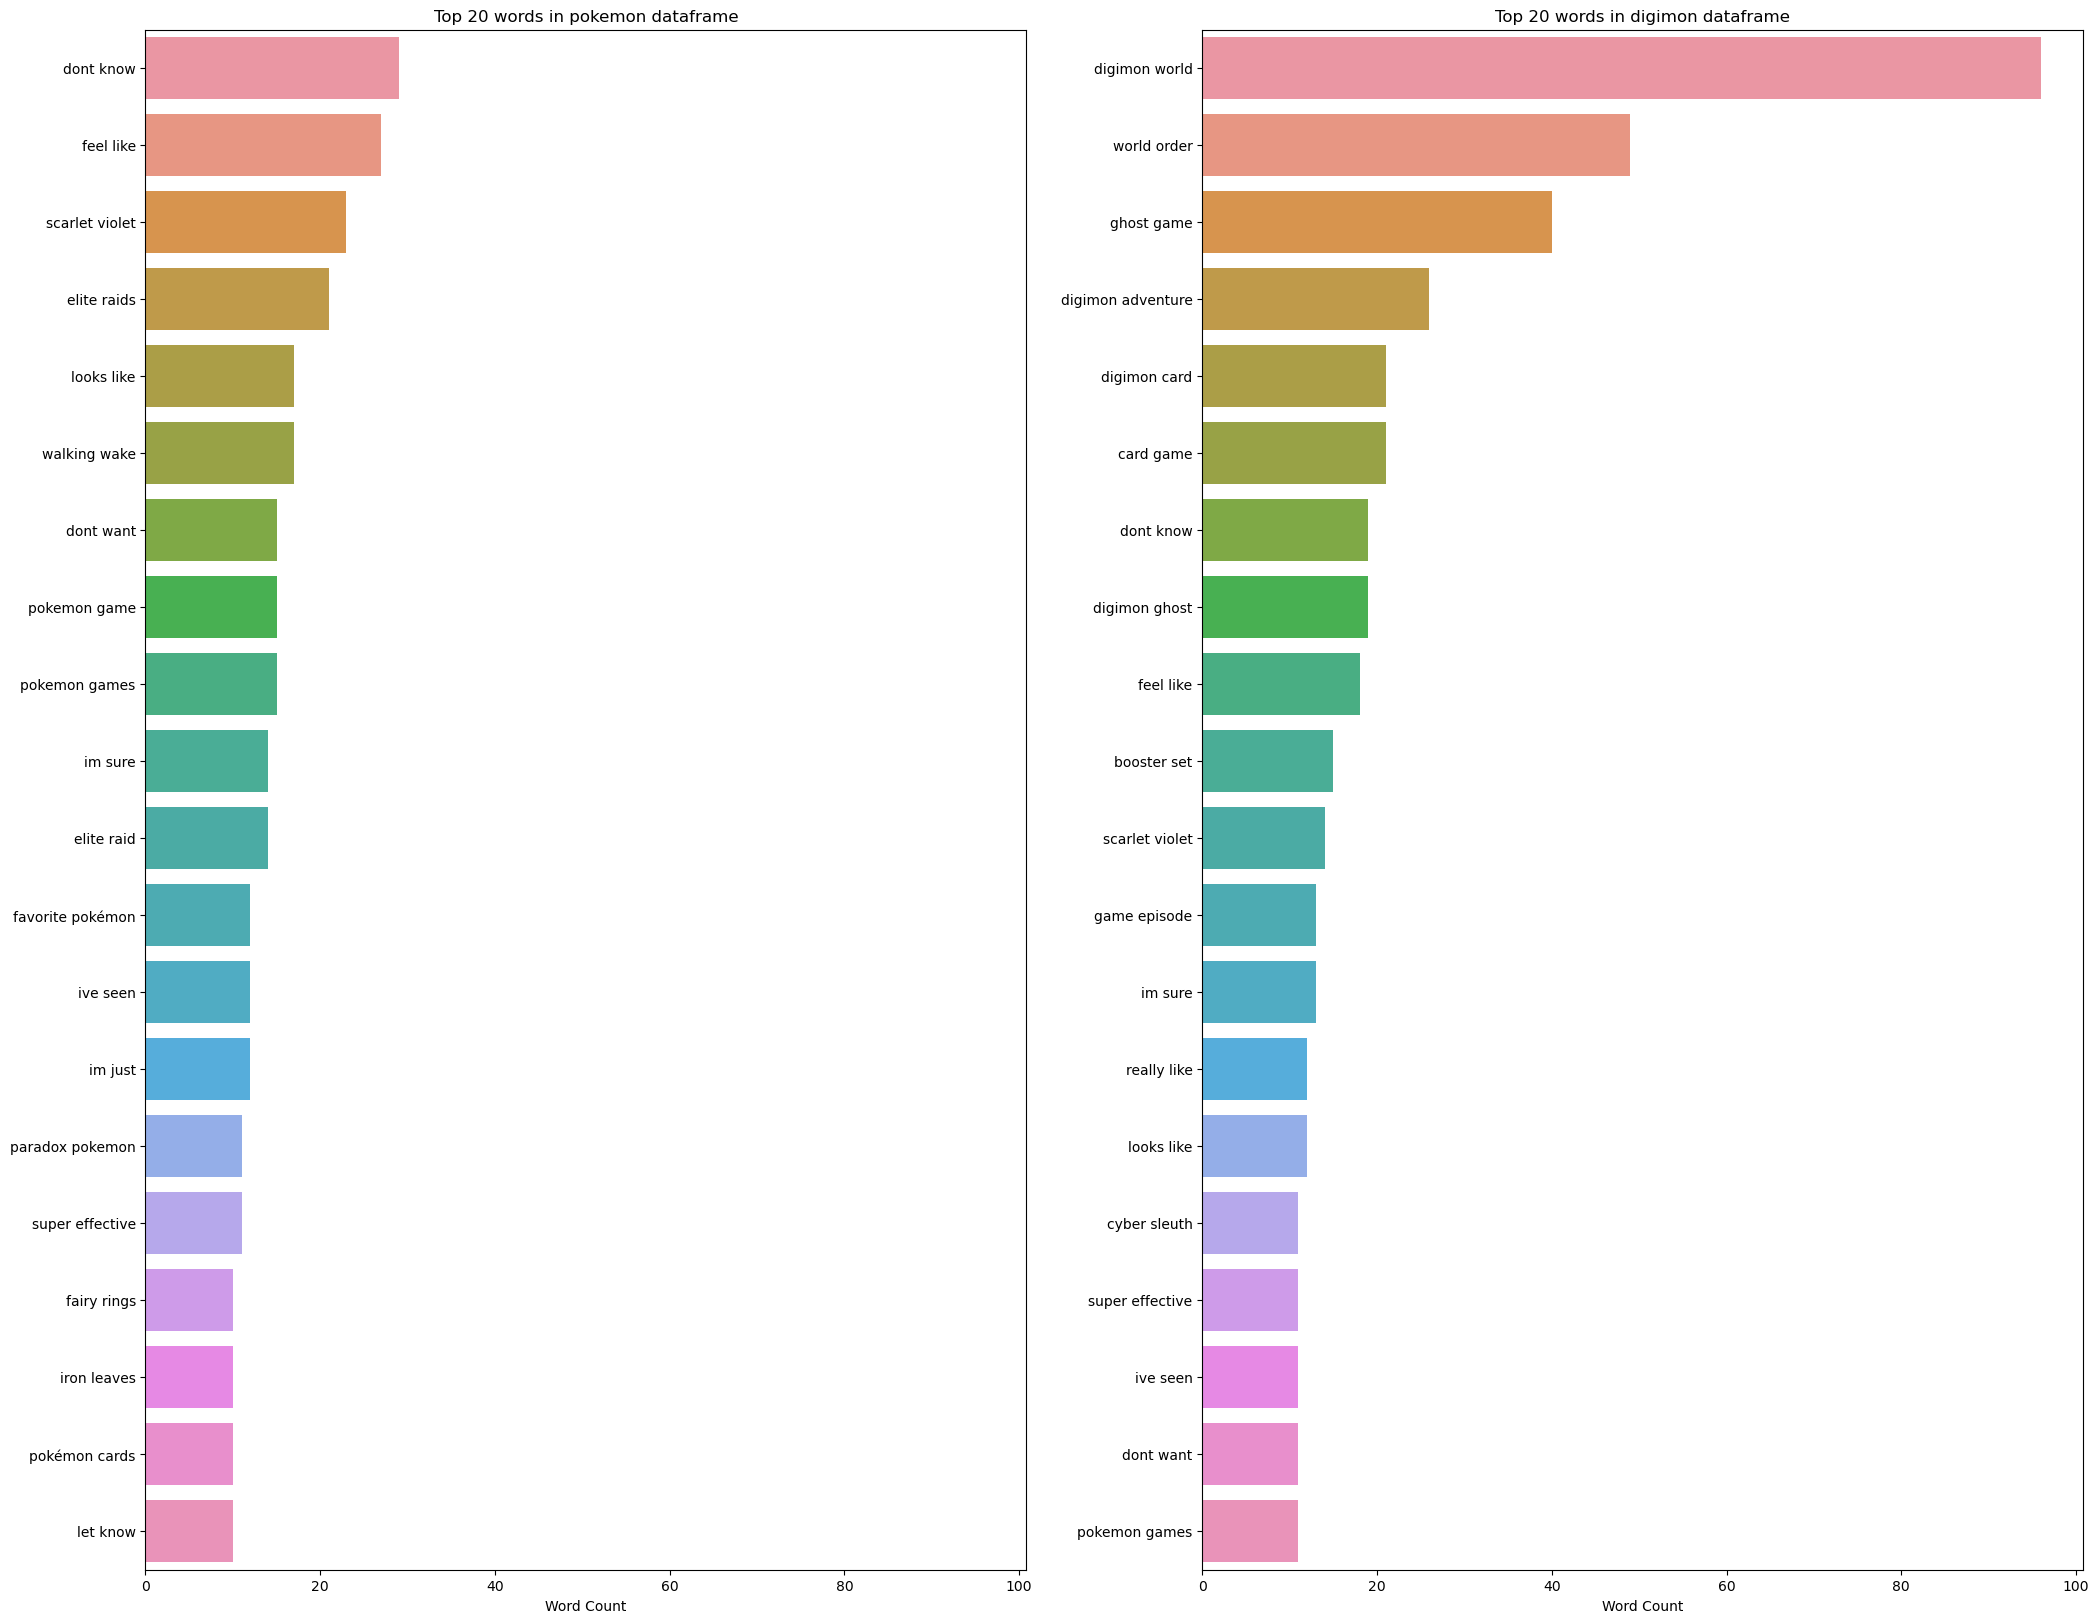

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25,20), sharex = True)
                      
sns.barplot( x=pokemon_top_20_2words, y=pokemon_top_20_2words.index.values,ax=ax[0])
ax[0].set_title('Top 20 words in pokemon dataframe')
ax[0].set_xlabel('Word Count')               
sns.barplot( x=digimon_top_20_2words, y=digimon_top_20_2words.index.values,ax=ax[1])
ax[1].set_title('Top 20 words in digimon dataframe')
ax[1].set_xlabel('Word Count')  

- we need to add addtional stop word exmaple:'im','dont','ive' as all this have no meaning 

In [48]:
cvec = CountVectorizer(stop_words='english', ngram_range = (3,3))

pokemon_cvec = cvec.fit_transform(df_pokemon['title'])
pokemon_cvec = pd.DataFrame(pokemon_cvec.toarray(),
                       columns = cvec.get_feature_names())
pokemon_top_3words = pokemon_cvec.sum().sort_values(ascending=False)
pokemon_top_20_3words = pokemon_top_3words.head(20)
pokemon_top_20_3words

daily pokémon ranking     4
pokémon scarlet violet    4
toad daily pokémon        4
wake iron leaves          3
shiny ho oh               3
ho oh shiny               3
walking wake iron         3
got shiny smeargle        2
thread 06 march           2
themed pc case            2
awww love deering         2
elite raid spawns         2
brilliant diamond team    2
pro using procreate       2
sona pla setting          2
finally got shiny         2
love deering adorable     2
drawn ipad pro            2
ipad pro using            2
new species cockroach     2
dtype: int64

In [47]:
cvec = CountVectorizer(stop_words='english', ngram_range = (3,3))

digimon_cvec = cvec.fit_transform(df_digimon['title_cleaned'])
digimon_cvec = pd.DataFrame(digimon_cvec.toarray(),
                       columns = cvec.get_feature_names())
digimon_top_3words = digimon_cvec.sum().sort_values(ascending=False)
digimon_top_20_3words = digimon_top_3words.head(20)
digimon_top_20_3words

digimon world order              46
digimon ghost game               19
digimon card game                16
ghost game episode               13
card game booster                 9
game booster set                  9
low end pc                        8
world order intel                 8
preview digimon card              6
parallel preview digimon          6
intel hd low                      4
order intel hd                    4
hd low end                        4
digimon card battle               4
digimon world trailer             4
mode parallel preview             4
anniversary digimon adventure     4
world order switch                4
burst mode parallel               4
ps digimon world                  3
dtype: int64

- tri gram have not much impact as the count is for pokemon max is 4 while digimon max is 46.


# Wordcloud for pokemon

In [56]:
text.ENGLISH_STOP_WORDS
add_stop_words = ['pokémon','im','ive','dont','just','use','know','like','oc','ill','id','isnt']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

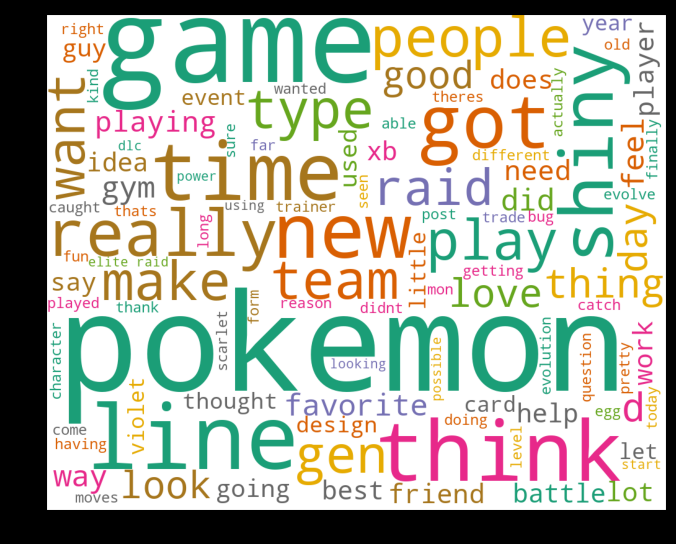

In [62]:
from wordcloud import WordCloud

#Quick check with WordCloud for most prominent words
wc_sb_pokemon = WordCloud(background_color="white", colormap="Dark2",width=1000, height=800,
               max_words=100, random_state=42,stopwords=stop_words).generate(' '.join(df_pokemon['text_cleaned'].tolist()))

plt.figure(figsize = (8,8) , facecolor = 'k')
plt.imshow(wc_sb_pokemon)


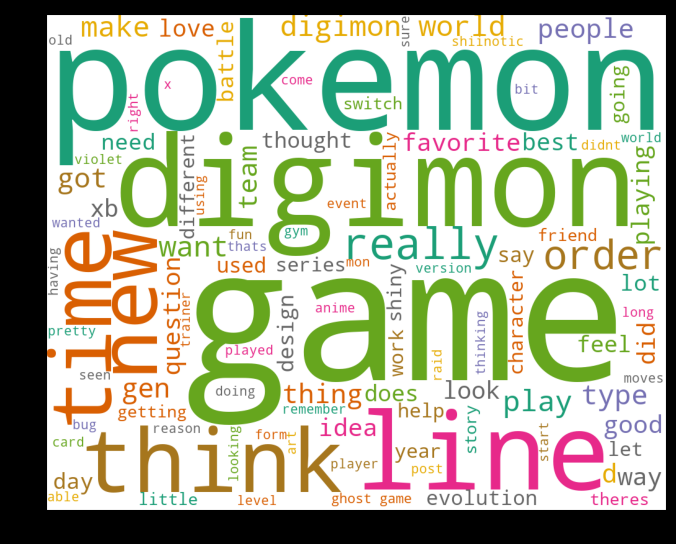

In [61]:
#Quick check with WordCloud for most prominent words
wc_sb_digimon = WordCloud(background_color="white", colormap="Dark2",width=1000, height=800,
               max_words=100, random_state=42,stopwords=stop_words).generate(' '.join(df_digimon['text_cleaned'].tolist()))

plt.figure(figsize = (8,8) , facecolor = 'k')
plt.imshow(wc_sb_digimon)


### Tokenizer to show number of word in title

In [30]:
tokenizer = RegexpTokenizer(r'\w+')
df_pokemon['words_in_sentence']=df_pokemon['title_cleaned'].apply(lambda x: tokenizer.tokenize(x)).apply(len)

df_pokemon.head()

,title,subreddit,body,text,title_cleaned,text_cleaned,words_in_sentence
0,[Weekly Questions Thread] 06 March 2023,pokemon,**Have any questions about Pokémon that you'd ...,[Weekly Questions Thread] 06 March 2023 **Have...,weekly questions thread march,weekly questions thread march have any quest...,4
1,/r/Pokemon is looking for moderators! Apply wi...,pokemon,[We choose YOU!](https://preview.redd.it/7gm1j...,/r/Pokemon is looking for moderators! Apply wi...,rpokemon is looking for moderators apply within,rpokemon is looking for moderators apply withi...,7
2,"""Crikey! Have a go at that beauty of a Pokemon...",pokemon,,"""Crikey! Have a go at that beauty of a Pokemon...",crikey have a go at that beauty of a pokemon ...,crikey have a go at that beauty of a pokemon ...,21
3,Remade the Pokémon Sleep logo with a more dese...,pokemon,,Remade the Pokémon Sleep logo with a more dese...,remade the pokémon sleep logo with a more dese...,remade the pokémon sleep logo with a more dese...,10
4,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),pokemon,,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),oc birb hisuian decidueye preevo concept,oc birb hisuian decidueye preevo concept,6


In [31]:
tokenizer = RegexpTokenizer(r'\w+')
df_digimon['words_in_sentence']=df_digimon['title_cleaned'].apply(lambda x: tokenizer.tokenize(x)).apply(len)

df_digimon.head()

,title,subreddit,body,text,title_cleaned,text_cleaned,words_in_sentence
0,"Digimon World: Next Order, Switch & PC Version...",digimon,https://preview.redd.it/mn16ywa24nja1.jpg?widt...,"Digimon World: Next Order, Switch & PC Version...",digimon world next order switch pc versions g...,digimon world next order switch pc versions g...,11
1,"Digimon Ghost Game Episode 65 ""The Black Zone ...",digimon,[Crunchyroll's page for Ghost Game is here](ht...,"Digimon Ghost Game Episode 65 ""The Black Zone ...",digimon ghost game episode the black zone of ...,digimon ghost game episode the black zone of ...,13
2,"While I didn't notice as a kid, as an adult it...",digimon,,"While I didn't notice as a kid, as an adult it...",while i didnt notice as a kid as an adult it r...,while i didnt notice as a kid as an adult it r...,24
3,Found at my local FYE- Digimon branded milk tea,digimon,,Found at my local FYE- Digimon branded milk tea,found at my local fye digimon branded milk tea,found at my local fye digimon branded milk tea,9
4,Super happy with how this turned out,digimon,,Super happy with how this turned out,super happy with how this turned out,super happy with how this turned out,7


In [32]:
df_pokemon.describe()

,words_in_sentence
count,1430.000000
mean,9.498601
std,7.171180
min,1.000000
25%,5.000000
50%,7.000000
75%,12.000000
max,62.000000


In [33]:
df_pokemon[df_pokemon['words_in_sentence']==0]

,title,subreddit,body,text,title_cleaned,text_cleaned,words_in_sentence


In [34]:
df_digimon.describe()

,words_in_sentence
count,1060.000000
mean,9.926415
std,7.835674
min,0.000000
25%,5.000000
50%,8.000000
75%,13.000000
max,56.000000


In [35]:
df_digimon[df_digimon['words_in_sentence']==0]

,title,subreddit,body,text,title_cleaned,text_cleaned,words_in_sentence
35,🙏🏻,digimon,,🙏🏻 With the exception of the unique Manaphy eg...,,with the exception of the unique manaphy egg ...,0
762,🌪️,digimon,,🌪️ Hey everyone! I recently started playing So...,,hey everyone i recently started playing souls...,0


In [36]:
df_digimon.drop(labels=[35,762], axis=0, inplace=True)

/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/870393556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pokemon['words_in_sentence'], label='Pokemon', color='royalblue')
/var/folders/9h/g66bx9554bn3vx164q9t1k3m0000gp/T/ipykernel_73198/870393556.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

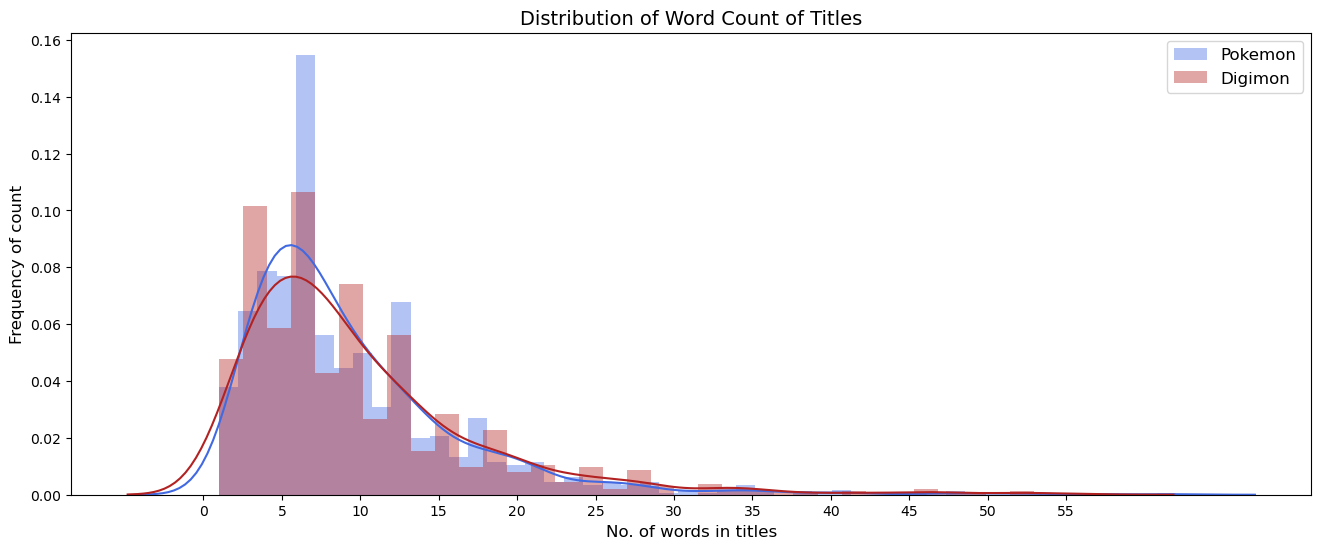

In [37]:
plt.figure(figsize=(16, 6))
sns.distplot(df_pokemon['words_in_sentence'], label='Pokemon', color='royalblue')
sns.distplot(df_digimon['words_in_sentence'], label='Digimon', color='firebrick')
plt.title('Distribution of Word Count of Titles', fontsize=14)
plt.xlabel('No. of words in titles', fontsize=12)
plt.xticks(range(0, 60, 5))
plt.ylabel('Frequency of count', fontsize=12)
plt.legend(fontsize='large');

combine both pokemon dataframe and digimon date frame together

In [38]:
combine_df = pd.concat([df_pokemon , df_digimon], axis =0)

In [39]:
combine_df

,title,subreddit,body,text,title_cleaned,text_cleaned,words_in_sentence
0,[Weekly Questions Thread] 06 March 2023,pokemon,**Have any questions about Pokémon that you'd ...,[Weekly Questions Thread] 06 March 2023 **Have...,weekly questions thread march,weekly questions thread march have any quest...,4
1,/r/Pokemon is looking for moderators! Apply wi...,pokemon,[We choose YOU!](https://preview.redd.it/7gm1j...,/r/Pokemon is looking for moderators! Apply wi...,rpokemon is looking for moderators apply within,rpokemon is looking for moderators apply withi...,7
2,"""Crikey! Have a go at that beauty of a Pokemon...",pokemon,,"""Crikey! Have a go at that beauty of a Pokemon...",crikey have a go at that beauty of a pokemon ...,crikey have a go at that beauty of a pokemon ...,21
3,Remade the Pokémon Sleep logo with a more dese...,pokemon,,Remade the Pokémon Sleep logo with a more dese...,remade the pokémon sleep logo with a more dese...,remade the pokémon sleep logo with a more dese...,10
4,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),pokemon,,[OC] 🍁Birb (Hisuian Decidueye Pre-Evo Concept),oc birb hisuian decidueye preevo concept,oc birb hisuian decidueye preevo concept,6
...,...,...,...,...,...,...,...
1055,Digimon World Re:Digitize:Decode (3DS version),DigimonWorld,DW Re:DD Ending (english patch)\n\n[https://ww...,Digimon World Re:Digitize:Decode (3DS version),digimon world redigitizedecode ds version,digimon world redigitizedecode ds version,5
1056,Digimon World 4 Trailer,DigimonWorld,,Digimon World 4 Trailer,digimon world trailer,digimon world trailer,3
1057,PS1 Digimon world 3 Trailer HD,DigimonWorld,,PS1 Digimon world 3 Trailer HD,ps digimon world trailer hd,ps digimon world trailer hd,5
1058,PS1 Digimon World 2 Trailer HD,DigimonWorld,,PS1 Digimon World 2 Trailer HD,ps digimon world trailer hd,ps digimon world trailer hd,5


In [40]:
# save file as svc
combine_df.to_csv('../datasets/combine_df.csv', index=False)